# Pymaceuticals Inc.
---

### Analysis

- Capomulin and Ramicane show lower mean tumor volume compared to the other treatment regimens. Ramicane is the lowest mean tumor volume (40.22) shown in summary statistics and box-plot of tumor volume for each drug regimen treatment.
- For Capomulin mice ID U364 it shows that over day 17 to 25 saw a significant decrease in tumor volume. 
- The correlation between mouse weight and the average tumor volume is 0.84. This show a strong correlation between mouse weight and average tumor volume.
### Summary
- Capomulin does much better compared other regimen treatment in reducing tumor volume. This supports Capomulin being a strong candidate to further investigation in clinical trials.  

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path) # Used to import the csv file into mouse_metadata
study_results = pd.read_csv(study_results_path) # Used to import the csv file into study_results

# Combine the data into a single DataFrame
study_results_complete = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
study_results_complete.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mice_count = study_results_complete["Mouse ID"].nunique() # Count of unique mice in specific column (can ignore Nan values)
mice_count


249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
dup_mice = study_results_complete.loc[study_results_complete.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
dup_mice


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
dup_mouse_id = study_results_complete.loc[study_results_complete["Mouse ID"] == dup_mice[0]]
dup_mouse_id


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = study_results_complete.drop(study_results_complete[study_results_complete["Mouse ID"] =="g989"].index, inplace = False)


In [6]:
# Checking the number of mice in the clean DataFrame.
unique_mice = clean_df["Mouse ID"].nunique() # Count of unique mice in specific column (can ignore Nan values)
unique_mice


248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
mean = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std_dev = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
SEM = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame({"Mean Tumor Volume": mean,
                           "Median Tumor Volume": median,
                           "Tumor Volume Variance": variance,
                           "Tumor Volume Std. Dev.": std_dev,
                           "Tumor Volume Std. Err.": SEM})
summary_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_agg = clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean","median","var","std","sem"]})
summary_agg


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

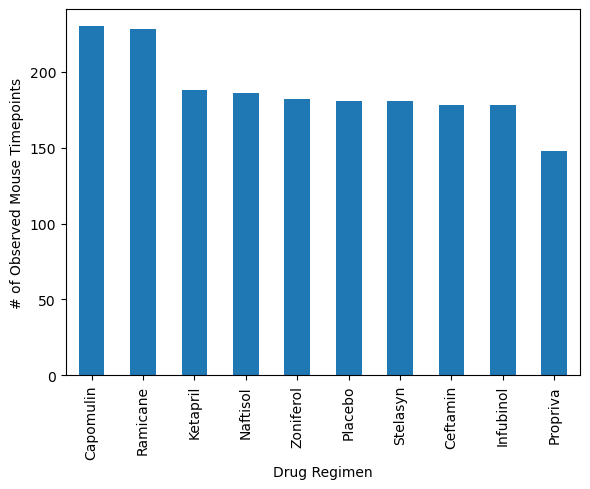

In [20]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_plot_data = clean_df.groupby("Drug Regimen")["Timepoint"].count().sort_values(ascending=False) # used clean DataFrame to group by Drug Regimen. Count and Sort Values
bar_plot = bar_plot_data.plot(kind='bar', figsize=(6,5)) # Bar plot and the size which will print
plt.xlabel("Drug Regimen") # Establish x-label
plt.ylabel("# of Observed Mouse Timepoints") # Establish y-label
plt.tight_layout() #adjust the bar plot
plt.show()


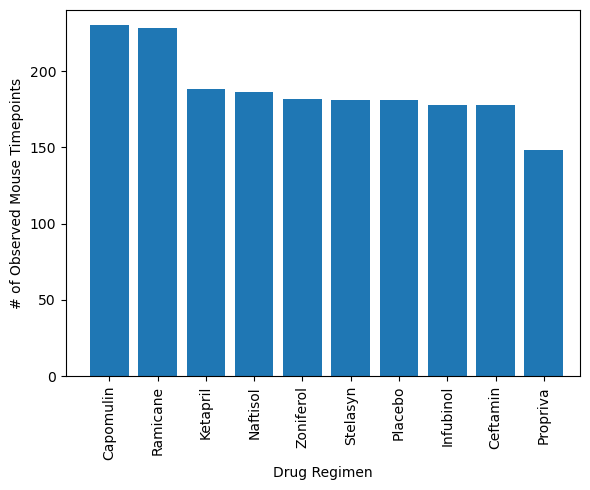

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
y_axis = clean_df["Drug Regimen"].value_counts() # Drug Regimen value counts
x_axis = np.arange(len(y_axis)) # Arange a NumPy function in Python used to create an array with evenly spaced values within a given interval
tick_location = [value for value in x_axis] # Drug Regimen unique value names
plt.figure(figsize=(6,5)) # Size of the graph
plt.bar(x_axis, y_axis, alpha=1, align ="center", width=0.8) # Bar Chart
plt.xticks(tick_location, y_axis.index.values, rotation="vertical") # How ticks will look in bar chart
# Set the limits of the x axis
plt.xlim(-0.9, len(x_axis)-0.25)
# Sets the y limits of the current chart
plt.ylim(0, max(y_axis)+10)

# Give our chart some labels
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.tight_layout()
plt.show()


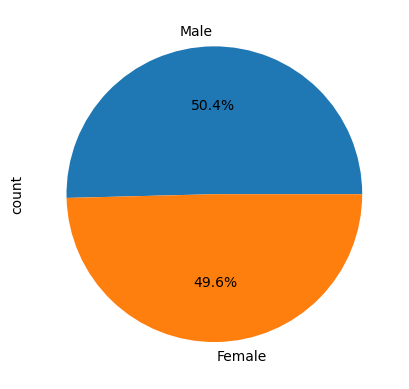

In [11]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender_mice = clean_df.groupby("Sex")["Mouse ID"].nunique().sort_values(ascending=False) # Group by gender of mice for unique mice. Sort values so Male will be first

# Make the pie chart
pie_plot = gender_mice.plot(kind="pie", autopct="%1.1f%%")
plt.ylabel("count") # Had override y label to counts instead of Mouse ID
plt.show()


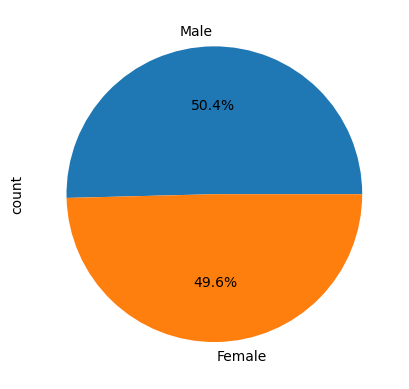

In [12]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
sex_mice = clean_df.groupby("Sex")["Mouse ID"].nunique().sort_values(ascending=False) # Group by gender of mice for unique mice. Sort values so Male will be first
labels = sex_mice.index.values

# Make the pie chart
plt.pie(sex_mice, labels=labels, autopct="%1.1f%%") # pyplot pie chart
plt.ylabel('count') # Override y label to counds instead of Mouse ID
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepnt = clean_df.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(greatest_timepnt, clean_df , on=(["Mouse ID", "Timepoint"]))


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
selected_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in selected_regimens:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = merged_df.loc[merged_df["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # add subset
    tumor_vol.append(final_tumor_vol) # Append the resulting final tumor volumes for each drug.
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([0.25,0.5,0.75]) # Quartiles calculation
    lowerq = quartiles[0.25] # Lower Quartile
    upperq = quartiles[0.75] # Upper Quartile
    iqr = upperq-lowerq # interquartile
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers= final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)] # outliers upper and lower bounds
    # print the results for four of the treatment regimens
    print(f"{drug}'s potential outliers: {outliers}")
    

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


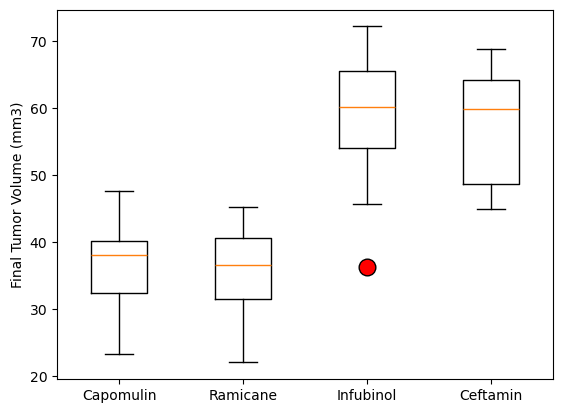

In [15]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
fig1,ax1 = plt.subplots() # Uses the matplotlib.pyplot module to create a figure and a set of subplots
ax1.set_ylabel("Final Tumor Volume (mm3)") # Set ylabel for all boxplots
# flierprops is a parameter to customize the appearance of outlier points, also known as "fliers."
flierprops = dict(marker='o', markerfacecolor='r', markersize=12,
                  linestyle='none', markeredgecolor='black')

plt.boxplot(tumor_vol, flierprops=flierprops)
plt.xticks([1,2,3,4],selected_regimens)
plt.show()


## Line and Scatter Plots

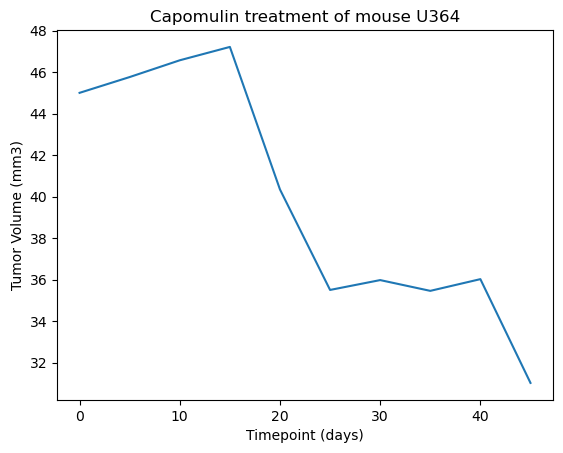

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_df = clean_df[clean_df["Drug Regimen"] == "Capomulin"] # Need only values equal to Capomulin
mouse_df = capomulin_df[capomulin_df["Mouse ID"] == "u364"] # Selected single mouse treatment
mouse_df.plot(x="Timepoint", y="Tumor Volume (mm3)", title="Capomulin treatment of mouse U364",
             xlabel="Timepoint (days)", ylabel="Tumor Volume (mm3)", legend=False)

plt.show()


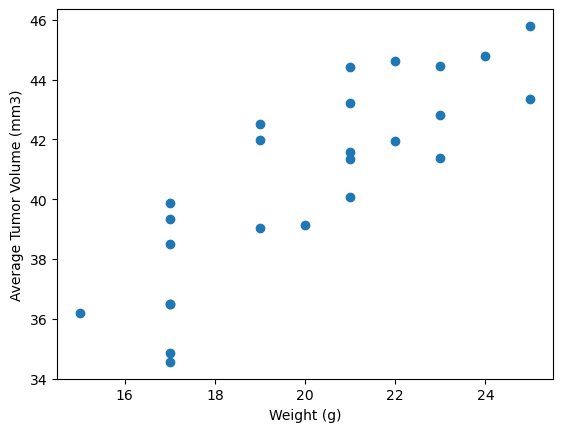

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_avg_df = capomulin_df.groupby("Mouse ID")[["Tumor Volume (mm3)","Weight (g)"]].mean() #Average of Mouse ID and Tumor Volume (mm3)
plt.scatter(capomulin_avg_df["Weight (g)"], capomulin_avg_df["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84.


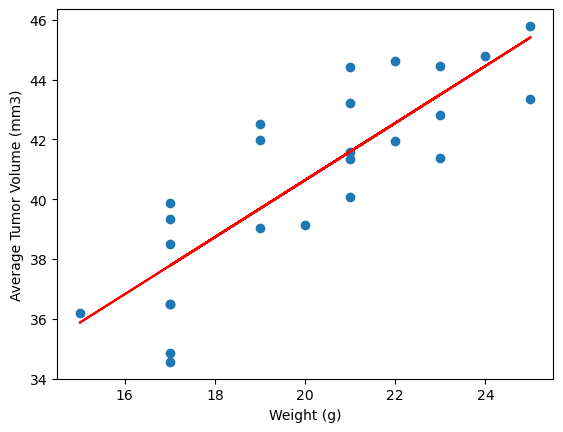

In [18]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(capomulin_avg_df["Weight (g)"], capomulin_avg_df["Tumor Volume (mm3)"])[0]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(capomulin_avg_df["Weight (g)"], capomulin_avg_df["Tumor Volume (mm3)"])
regress_values = capomulin_avg_df["Weight (g)"] * slope + intercept
plt.scatter(capomulin_avg_df["Weight (g)"], capomulin_avg_df["Tumor Volume (mm3)"])
plt.plot(capomulin_avg_df["Weight (g)"], regress_values, "r-")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
#Correlation calculations
print(f"The correlation between mouse weight and the average tumor volume is\
 {round(correlation,2)}.")
plt.show()
